## KHÁM PHÁ DỮ LIỆU

### 1. Đọc dữ liệu, tính số dòng và cột

Đầu tiên, ta import các thư viện cần thiết.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# .. import more libraries

Tiếp đến đọc các file điểm thi của các năm và lưu vào các dataframe tương ứng. Sau đó in ra 5 dòng đầu tiên.

In [50]:
grade_df = {}
grade_df['2020'] = pd.read_csv('data/diemthi2020_final.csv')
grade_df['2020'].head()

,Unnamed: 0,SBD,Tỉnh/Thành phố,Toán,Văn,Lí,Hóa,Sinh,TB-KHTN,Sử,Địa,GDCD,TB-KHXH,Ngoại ngữ
0,0,18014547,BẮC GIANG,6.4,6.75,NaN,NaN,NaN,NaN,4.75,7.00,6.50,6.08,4.2
1,1,18014530,BẮC GIANG,7.6,6.00,NaN,NaN,NaN,NaN,3.75,7.75,7.75,6.42,2.8
2,2,18014521,BẮC GIANG,4.8,4.75,NaN,NaN,NaN,NaN,4.00,6.50,NaN,5.25,NaN
3,3,18014517,BẮC GIANG,8.0,7.00,NaN,NaN,NaN,NaN,8.25,8.00,9.50,8.58,5.8
4,4,18014523,BẮC GIANG,8.2,6.50,8.0,8.5,5.0,7.17,NaN,NaN,NaN,NaN,4.0


In [51]:
grade_df['2021'] = pd.read_csv('data/diemthi2021_final.csv')
grade_df['2021'].head()

,Unnamed: 0,SBD,Toán,Lí,Hóa,Sinh,Sử,Địa,Văn,GDCD,Ngoại ngữ,Tỉnh/Thành phố,TB-KHTN,TB-KHXH
0,0,1000002,9.2,NaN,NaN,NaN,5.75,9.75,8.25,9.25,10.0,HÀ NỘI,NaN,8.25
1,1,1000003,4.4,NaN,NaN,NaN,4.25,4.00,6.25,NaN,NaN,HÀ NỘI,NaN,NaN
2,2,1000004,8.4,4.00,3.00,3.50,NaN,NaN,6.75,NaN,10.0,HÀ NỘI,3.50,NaN
3,3,1000005,8.8,8.25,5.75,5.25,NaN,NaN,8.25,NaN,9.4,HÀ NỘI,6.42,NaN
4,4,1000006,8.0,NaN,NaN,NaN,5.00,6.50,8.75,9.25,8.6,HÀ NỘI,NaN,6.92


In [52]:
grade_df['2022'] = pd.read_csv('data/diemthi2022_final.csv')
grade_df['2022'].head()

,Unnamed: 0,SBD,Toán,Văn,Ngoại ngữ,Lí,Hóa,Sinh,Sử,Địa,GDCD,Tỉnh/Thành phố,TB-KHTN,TB-KHXH
0,0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,HÀ NỘI,NaN,5.83
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,HÀ NỘI,NaN,8.08
2,2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,HÀ NỘI,NaN,7.17
3,3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,HÀ NỘI,NaN,7.17
4,4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,HÀ NỘI,NaN,8.25


Tính số dòng, số cột và lưu vào 2 biến `n_rows` và `n_cols`.

In [53]:
n_rows = {}
n_cols = {}
for year in grade_df.keys():
    n_rows[year], n_cols[year] = grade_df[year].shape
    print(f'Number of rows in {year}: {n_rows[year]}')
    print(f'Number of columns in {year}: {n_cols[year]}')

Number of rows in 2020: 870486
Number of columns in 2020: 14
Number of rows in 2021: 960902
Number of columns in 2021: 14
Number of rows in 2022: 995441
Number of columns in 2022: 14


### 2. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng trong tập dữ liệu này tương ứng với điểm thi các môn của một thí sinh riêng biệt. Gồm các môn Toán, Ngữ Văn, Ngoại Ngữ, Vật Lý, Hóa Học, Sinh Học, Lịch Sử, Địa Lý, GDCD và điểm trung bình các tổ hợp môn.
Do vậy, ta có thể thấy rằng không có dòng nào bị "lạc loài".

### 3. Dữ liệu có các dòng bị lặp không?

Ta kiểm tra xem có dòng nào bị lặp không bằng cách sử dụng các phương `duplicated()` và `any()` trên các dataframe `grade_df` và lưu kết quả vào biến `have_duplicated_rows`. Biến này sẽ có giá trị `True` nếu dữ liệu có các dòng bị lặp và có giá trị `False` nếu ngược.

In [54]:
have_duplicate_rows = {}
for year in grade_df.keys():
    have_duplicate_rows[year] = grade_df[year].duplicated().any()
    print(f'Have duplicate rows in {year}: {have_duplicate_rows[year]}')

Have duplicate rows in 2020: False
Have duplicate rows in 2021: False
Have duplicate rows in 2022: False


Như vậy ta thấy rằng dữ liệu không có các dòng bị lặp.

### 4. Kiểu dữ liệu của mỗi cột

Ta sử dụng phương thức `dtypes` trên `grade_df` để xem kiểu dữ liệu của mỗi cột. Kết quả được lưu vào dataframe `col_dtypes`; dataframe này có tên dòng là các năm và tên cột là các cột trong `grade_df`.

In [55]:
col_dtypes = {}
for year in grade_df.keys():
    col_dtypes[year] = grade_df[year].dtypes
col_dtypes = pd.DataFrame(col_dtypes).T
col_dtypes

,GDCD,Hóa,Lí,Ngoại ngữ,SBD,Sinh,Sử,TB-KHTN,TB-KHXH,Toán,Tỉnh/Thành phố,Unnamed: 0,Văn,Địa
2020,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64
2021,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64
2022,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,object,int64,float64,float64


Có thể thấy, kiểu dữ liệu các cột ở ba năm đều giống nhau. Về mặt kiểu dữ liệu, các thuộc tính của tập dữ liệu này đã ở định dạng phù hợp, nên không cần phải xử lý.

### 5. Xem xét sự phân bố giá trị của các cột dữ liệu dạng số.

Ta cần xem xét đến các giá trị thiếu trong dữ liệu:
- Không thực hiện thống kê trên 3 cột SBD, Unnamed và Tỉnh/Thành phố do các cột này không có ý nghĩa và cột Tỉnh/Thành phố không phải dạng số và sẽ được xem xét sau.
- Đầu tiên, ta tính tỉ lệ giá trị thiếu của từng cột bằng cách sử dụng phương thức `isnull()` trên dataframe `grade_df` và tính tổng số giá trị thiếu của từng cột bằng phương thức `sum()`. 
- Cuối cùng ta chia số dòng và lưu kết quả vào `missing_ratio`.

In [56]:
missing_ratio = {}
for year in grade_df.keys():
    missing_ratio[year] = grade_df[year].select_dtypes(include=['float64']).isnull().sum() / n_rows[year]
missing_ratio = pd.DataFrame(missing_ratio).T
missing_ratio

,GDCD,Hóa,Lí,Ngoại ngữ,Sinh,Sử,TB-KHTN,TB-KHXH,Toán,Văn,Địa
2020,0.445161,0.660493,0.663077,0.113027,0.666420,0.346823,0.658150,0.346564,0.004486,0.015992,0.362342
2021,0.460029,0.651471,0.653136,0.122572,0.657041,0.354898,0.660342,0.460237,0.010607,0.013516,0.360770
2022,0.443118,0.671134,0.672986,0.125404,0.676326,0.337317,0.679855,0.443372,0.012773,0.014098,0.339568


Có thể thấy, các cột phân loại như `SBD`, `Tỉnh/Thành phố`, `Unnamed` (tương ứng với số thứ tự) đều có tỉ lệ giá trị thiếu là 0. Các cột còn lại đều là cột điểm thi và có tỉ lệ giá trị thiếu khác 0. Điều này cho thấy rằng có một số thí sinh không thi một số môn nào đó và không ảnh hưởng đến việc phân tích sau này.

Ta cũng cần tính các giá trị thống kê mô tả của các cột numeric bằng phương thức `describe()` trên `grade_df`.

In [57]:
print(f'Descriptive statistics of 2020:')
grade_df['2020'].describe()

Descriptive statistics of 2020:


,Unnamed: 0,SBD,Toán,Văn,Lí,Hóa,Sinh,TB-KHTN,Sử,Địa,GDCD,TB-KHXH,Ngoại ngữ
count,870486.00000,8.704860e+05,866581.000000,856565.000000,293287.000000,295536.000000,290377.000000,297576.000000,568581.000000,555072.000000,482980.000000,568807.000000,772098.000000
mean,435242.50000,2.800845e+07,6.662271,6.601825,6.718001,6.705225,5.588041,6.341871,5.181097,6.773215,8.125164,6.549127,4.568337
std,251287.80755,1.898843e+07,1.819042,1.248463,1.497900,1.607924,1.350572,1.109016,1.598987,1.171702,1.090310,1.215503,1.808446
min,0.00000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217621.25000,1.200657e+07,5.400000,6.000000,5.750000,5.500000,4.750000,5.670000,4.000000,6.000000,7.500000,5.830000,3.200000
50%,435242.50000,2.801803e+07,7.000000,6.750000,7.000000,7.000000,5.500000,6.500000,5.000000,7.000000,8.250000,6.580000,4.200000
75%,652863.75000,4.400927e+07,8.000000,7.500000,7.750000,8.000000,6.500000,7.170000,6.250000,7.500000,9.000000,7.380000,5.600000
max,870485.00000,6.400582e+07,10.000000,10.000000,10.000000,10.000000,10.000000,9.880000,10.000000,10.000000,10.000000,10.000000,10.000000


In [58]:
print(f'Descriptive statistics of 2021:')
grade_df['2021'].describe()

Descriptive statistics of 2021:


,Unnamed: 0,SBD,Toán,Lí,Hóa,Sinh,Sử,Địa,Văn,GDCD,Ngoại ngữ,TB-KHTN,TB-KHXH
count,960902.000000,9.609020e+05,950710.000000,333302.000000,334902.000000,329550.000000,619880.000000,614237.000000,947914.000000,518859.000000,843122.000000,326378.000000,518659.000000
mean,454884.513203,2.632163e+07,6.618351,6.582776,6.634617,5.511298,4.975644,6.955494,6.483819,8.377862,5.855004,6.237838,6.833293
std,276207.978731,1.906657e+07,1.683284,1.393538,1.598686,1.443058,1.770025,1.178250,1.363939,1.155020,2.216757,1.073473,1.142297
min,0.000000,1.000002e+06,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580000,0.420000
25%,213940.250000,8.003250e+06,5.400000,5.750000,5.500000,4.500000,3.500000,6.250000,5.750000,7.750000,4.000000,5.500000,6.080000
50%,454165.500000,2.601839e+07,7.000000,6.750000,7.000000,5.500000,4.750000,7.000000,6.500000,8.500000,5.600000,6.330000,6.830000
75%,694390.750000,4.200339e+07,8.000000,7.750000,8.000000,6.500000,6.250000,7.750000,7.500000,9.250000,7.800000,7.000000,7.670000
max,934616.000000,6.400684e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.670000,9.920000


In [59]:
print(f'Descriptive statistics of 2022:')
grade_df['2022'].describe()

Descriptive statistics of 2022:


,Unnamed: 0,SBD,Toán,Văn,Ngoại ngữ,Lí,Hóa,Sinh,Sử,Địa,GDCD,TB-KHTN,TB-KHXH
count,995441.000000,9.954410e+05,982726.000000,981407.000000,870609.000000,325523.000000,327367.000000,322198.000000,659662.000000,657421.000000,554343.000000,318685.000000,554090.000000
mean,497720.000000,2.759692e+07,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266,6.137013,7.088246
std,287359.208994,1.917092e+07,1.675435,1.379602,1.949547,1.441925,1.600393,1.448270,1.612879,1.215013,1.067272,1.102178,1.086883
min,0.000000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000
25%,248860.000000,1.000217e+07,5.400000,5.580000,3.600000,5.750000,5.500000,4.000000,5.250000,5.750000,7.500000,5.420000,6.420000
50%,497720.000000,2.801886e+07,6.800000,6.500000,4.800000,7.000000,7.000000,4.750000,6.500000,6.750000,8.250000,6.250000,7.170000
75%,746580.000000,4.400582e+07,7.800000,7.500000,6.600000,7.750000,8.000000,6.000000,7.500000,7.500000,8.750000,6.920000,7.830000
max,995440.000000,6.400659e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.670000,10.000000


### 6. Xem xét sự phân bố giá trị của các cột dữ liệu không phải dạng số.

Trong 3 bộ dữ liệu về điểm thi của cả 3 năm thì chỉ có duy nhất cột 'Tỉnh/Thành phố' là cột có kiểu dữ liệu không phải dạng số.

**Nhận xét:** Do cột 'Tỉnh/Thành phố' có thể được suy ra từ SBD của thí sinh, do đó có thể rút ra một số nhận xét sau:
- Không tồn tại giá trị thiếu trong cột 'Tỉnh/Thành phố' do tương ứng với mỗi thí sinh trong bộ dữ liệu đều sẽ suy ra được mã tỉnh.
- Số lượng các giá trị khác nhau của cột này cũng sẽ bằng 63, chính là 63 tỉnh thành trên đất nước Việt Nam (tuy mã tỉnh lớn nhất là 64 nhưng không có mã tỉnh 20, nên tương ứng chỉ có 63 tỉnh thành).
- Ta sẽ thực hiện tính tỉ lệ % (từ 0 đến 100) của mỗi giá trị khác nhau trong cột 'Tỉnh/Thành phố' được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ % (value_ratios). Sau đó lưu vào DataFrame với dòng là value_ratios và cột tương ứng là 3 năm từ 2020 đến 2022. 
- Viết hàm 'computeValueRatios' nhận vào một DataFrame dữ liệu của một năm và trả về dictionary lưu value_ratios cần tính đã trình bày ở trên của năm đó.
- Sau khi có được ba dictionary cho ba năm, dùng chúng tạo thành một DataFrame.

In [60]:
def computeValueRatios(df):
    col_name='Tỉnh/Thành phố'
    df=df.copy()
    df=df.select_dtypes(exclude=['float64','int64'])
    vals=list(df[col_name].values)
    num_vals=list(set(vals))
    dic={}
    new=[(df[col_name].value_counts()[j]/len(vals)*100).round(3) for j in num_vals]
    dic={num_vals[j]:new[j] for j in range(len(num_vals))}
    dic_sort={k:v for k,v in sorted(dic.items(), key= lambda item:item[1], reverse=True)}
    return dic_sort

In [61]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
col_names=['2020','2021','2022']
titles=["value_ratios"]
values_list=[computeValueRatios(grade_df[f'{i}']) for i in range(2020,2023)]
dic={col_names[i]:[values_list[i]] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

C:\Users\FPT SHOP\AppData\Local\Temp\ipykernel_10480\4207576729.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,2020,2021,2022
titles,,,
value_ratios,"{'HÀ NỘI': 9.059, 'HỒ CHÍ MINH': 8.553, 'THANH HÓA': 3.991, 'NGHỆ AN': 3.57, 'ĐỒNG NAI': 3.246, 'THÁI BÌNH': 2.251, 'HẢI DƯƠNG': 2.25, 'BẮC GIANG': 2.217, 'NAM ĐỊNH': 2.144, 'HẢI PHÒNG': 2.129, 'BÌNH ĐỊNH': 1.939, 'HÀ TĨNH': 1.759, 'AN GIANG': 1.751, 'THÁI NGUYÊN': 1.745, 'BẮC NINH': 1.68, 'QUẢNG NINH': 1.671, 'TIỀN GIANG': 1.641, 'ĐẮK LẮK': 1.602, 'LONG AN': 1.591, 'PHÚ THỌ': 1.586, 'LÂM ĐỒNG': 1.551, 'ĐỒNG THÁP': 1.538, 'GIA LAI': 1.53, 'KHÁNH HÒA': 1.504, 'HƯNG YÊN': 1.468, 'THỪA THIÊN - HUẾ': 1.438, 'KIÊN GIANG': 1.428, 'VĨNH PHÚC': 1.398, 'QUẢNG NGÃI': 1.375, 'SƠN LA': 1.336, 'BÀ RỊA – VŨNG TÀU': 1.314, 'BÌNH DƯƠNG': 1.308, 'BẾN TRE': 1.3, 'BÌNH THUẬN': 1.251, 'QUẢNG BÌNH': 1.224, 'CẦN THƠ': 1.223, 'VĨNH LONG': 1.173, 'PHÚ YÊN': 1.158, 'BÌNH PHƯỚC': 1.123, 'CÀ MAU': 1.107, 'NINH BÌNH': 1.059, 'HÒA BÌNH': 1.051, 'HÀ NAM': 0.985, 'TÂY NINH': 0.982, 'LẠNG SƠN': 0.978, 'SÓC TRĂNG': 0.978, 'TUYÊN QUANG': 0.918, 'QUẢNG TRỊ': 0.907, 'TRÀ VINH': 0.906, 'YÊN BÁI': 0.851, 'QUẢNG NAM': 0.836, 'LÀO CAI': 0.73, 'ĐĂK NÔNG': 0.714, 'HẬU GIANG': 0.668, 'NINH THUẬN': 0.657, 'HÀ GIANG': 0.646, 'ĐIỆN BIÊN': 0.644, 'BẠC LIÊU': 0.642, 'CAO BẰNG': 0.528, 'KON TUM': 0.493, 'LAI CHÂU': 0.379, 'BẮC KẠN': 0.328}","{'HÀ NỘI': 10.479, 'HỒ CHÍ MINH': 8.977, 'THANH HÓA': 4.167, 'NGHỆ AN': 3.572, 'HẢI PHÒNG': 2.445, 'THÁI BÌNH': 2.379, 'HẢI DƯƠNG': 2.317, 'ĐỒNG NAI': 2.231, 'BẮC GIANG': 2.182, 'NAM ĐỊNH': 2.177, 'ĐẮK LẮK': 2.059, 'BÌNH ĐỊNH': 1.867, 'HÀ TĨNH': 1.797, 'THÁI NGUYÊN': 1.76, 'QUẢNG NAM': 1.738, 'QUẢNG NINH': 1.703, 'LONG AN': 1.702, 'BẮC NINH': 1.7, 'TIỀN GIANG': 1.69, 'PHÚ THỌ': 1.681, 'LÂM ĐỒNG': 1.489, 'HƯNG YÊN': 1.475, 'VĨNH PHÚC': 1.457, 'GIA LAI': 1.45, 'KIÊN GIANG': 1.426, 'THỪA THIÊN - HUẾ': 1.383, 'BẾN TRE': 1.371, 'BÌNH DƯƠNG': 1.353, 'BÀ RỊA – VŨNG TÀU': 1.349, 'QUẢNG NGÃI': 1.346, 'ĐÀ NẴNG': 1.314, 'CẦN THƠ': 1.261, 'BÌNH THUẬN': 1.253, 'QUẢNG BÌNH': 1.239, 'SƠN LA': 1.185, 'VĨNH LONG': 1.182, 'NINH BÌNH': 1.15, 'CÀ MAU': 1.136, 'BÌNH PHƯỚC': 1.078, 'HÀ NAM': 1.006, 'TÂY NINH': 1.004, 'SÓC TRĂNG': 0.998, 'LẠNG SƠN': 0.992, 'HÒA BÌNH': 0.986, 'TRÀ VINH': 0.916, 'TUYÊN QUANG': 0.903, 'QUẢNG TRỊ': 0.883, 'YÊN BÁI': 0.842, 'LÀO CAI': 0.763, 'HẬU GIANG': 0.709, 'ĐĂK NÔNG': 0.695, 'KHÁNH HÒA': 0.671, 'BẠC LIÊU': 0.659, 'ĐIỆN BIÊN': 0.652, 'NINH THUẬN': 0.621, 'HÀ GIANG': 0.583, 'AN GIANG': 0.577, 'CAO BẰNG': 0.493, 'KON TUM': 0.482, 'PHÚ YÊN': 0.373, 'LAI CHÂU': 0.371, 'BẮC KẠN': 0.301}","{'HÀ NỘI': 9.739, 'HỒ CHÍ MINH': 8.498, 'THANH HÓA': 3.764, 'NGHỆ AN': 3.673, 'ĐỒNG NAI': 3.151, 'HẢI PHÒNG': 2.25, 'BẮC GIANG': 2.065, 'HẢI DƯƠNG': 2.052, 'ĐẮK LẮK': 2.044, 'THÁI BÌNH': 2.024, 'NAM ĐỊNH': 1.986, 'AN GIANG': 1.866, 'BÌNH ĐỊNH': 1.857, 'HÀ TĨNH': 1.738, 'QUẢNG NAM': 1.682, 'BẮC NINH': 1.592, 'PHÚ THỌ': 1.588, 'QUẢNG NINH': 1.57, 'LONG AN': 1.539, 'THÁI NGUYÊN': 1.515, 'ĐỒNG THÁP': 1.511, 'TIỀN GIANG': 1.51, 'KIÊN GIANG': 1.439, 'LÂM ĐỒNG': 1.417, 'GIA LAI': 1.414, 'KHÁNH HÒA': 1.409, 'HƯNG YÊN': 1.395, 'VĨNH PHÚC': 1.394, 'THỪA THIÊN - HUẾ': 1.336, 'QUẢNG NGÃI': 1.336, 'BÌNH DƯƠNG': 1.286, 'BÌNH THUẬN': 1.279, 'BÀ RỊA – VŨNG TÀU': 1.272, 'ĐÀ NẴNG': 1.263, 'BẾN TRE': 1.236, 'CẦN THƠ': 1.225, 'SƠN LA': 1.138, 'QUẢNG BÌNH': 1.117, 'PHÚ YÊN': 1.092, 'BÌNH PHƯỚC': 1.075, 'CÀ MAU': 1.074, 'NINH BÌNH': 1.055, 'VĨNH LONG': 1.037, 'SÓC TRĂNG': 1.003, 'TÂY NINH': 0.981, 'LẠNG SƠN': 0.965, 'HÒA BÌNH': 0.962, 'TRÀ VINH': 0.95, 'HÀ NAM': 0.923, 'QUẢNG TRỊ': 0.868, 'TUYÊN QUANG': 0.846, 'YÊN BÁI': 0.808, 'LÀO CAI': 0.724, 'ĐĂK NÔNG': 0.688, 'HẬU GIANG': 0.658, 'BẠC LIÊU': 0.644, 'ĐIỆN BIÊN': 0.644, 'NINH THUẬN': 0.59, 'HÀ GIANG': 0.589, 'CAO BẰNG': 0.507, 'KON TUM': 0.475, 'LAI CHÂU': 0.368, 'BẮC KẠN': 0.307}"


**Nhận xét:**
- Số lượng các thí sinh thi của các tỉnh thành tham dự kì thi qua các năm luôn đông nhất ở 5 tỉnh thành lớn là: Hà Nội, Hồ Chí Minh, Thanh Hóa, Nghệ An, Đồng Nai.
- Những tỉnh thành đóng góp ít thí sinh nhất cho kì thi luôn là những nơi vùng cao như: Cao Bằng, Kon Tum, Lai Châu, Bắc Cạn.
- Số lượng thí sinh thi ở mỗi tỉnh qua các năm không chênh lệch nhau nhiều lắm cho thấy được sự ổn định của việc tốt nghiệp THPT ở các tỉnh thành.

## ĐƯA RA CÁC CÂU HỎI VÀ TRẢ LỜI

# Câu hỏi 4

#### Nội dung câu hỏi

Tìm ra top 5 tỉnh thành có điểm thi Ngoại ngữ cao nhất của từng năm 2020, 2021, 2022. Liệu qua từng năm, các vị trí top này có sự biến động gì hay không?

#### Ý nghĩa khi trả lời được câu hỏi

Sau khi trả lời được câu hỏi này, chúng ta sẽ biết được đâu là những tỉnh thành có tỉ lệ cao số học sinh học tốt ở các bộ môn ngoại ngữ. Và liệu rằng trình độ ngoại ngữ có mối tương quan nào với các yếu tố kinh tế xã hội hay không?

#### Tiền xử lý

Đây là dạng câu hỏi thống kê kết quả, vì vậy để trả lời cho câu hỏi này chúng ta sẽ tìm ra top 5 tỉnh/thành phố có kết quả điểm thi THPTQG môn ngoại ngữ cao nhất qua từng năm:

   - Với năm 2020, tạo DataFrame `df1` gồm 2 thuộc tính là 'ĐTB ngoại ngữ' và 'Tỉnh/Thành phố' bằng cách sử dụng phương thức `groupby` để gom nhóm thuộc tính 'Ngoại ngữ' theo 'Tỉnh\Thành phố' và tính giá trị `mean`.
   - Tương tự với năm 2021, 2022 (ứng với 2 dataframe là `df2`, `df3`).

**Code**

In [82]:
df1=grade_df["2020"][["Ngoại ngữ","Tỉnh/Thành phố"]].groupby("Tỉnh/Thành phố").mean().sort_values(by="Ngoại ngữ", ascending=False).reset_index()
df1.rename(columns = {'Ngoại ngữ':'ĐTB ngoại ngữ'}, inplace = True)
df2=grade_df["2021"][["Ngoại ngữ","Tỉnh/Thành phố"]].groupby("Tỉnh/Thành phố").mean().sort_values(by="Ngoại ngữ", ascending=False).reset_index()
df2.rename(columns = {'Ngoại ngữ':'ĐTB ngoại ngữ'}, inplace = True)
df3=grade_df["2022"][["Ngoại ngữ","Tỉnh/Thành phố"]].groupby("Tỉnh/Thành phố").mean().sort_values(by="Ngoại ngữ", ascending=False).reset_index()
df3.rename(columns = {'Ngoại ngữ':'ĐTB ngoại ngữ'}, inplace = True)

#### Phân tích dữ liệu để trả lời cho các câu hỏi

- Tiến hành trực quan hóa bằng biểu đồ `bar` (thư viện `plotly.express`) trong đó: trục hoành là 'Tỉnh\Thành phố' và trục tung sẽ là 'ĐTB môn toán'.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

**Code**

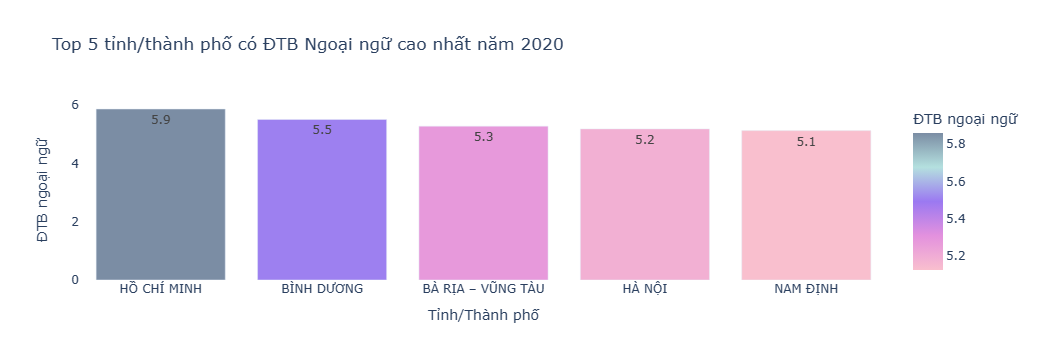

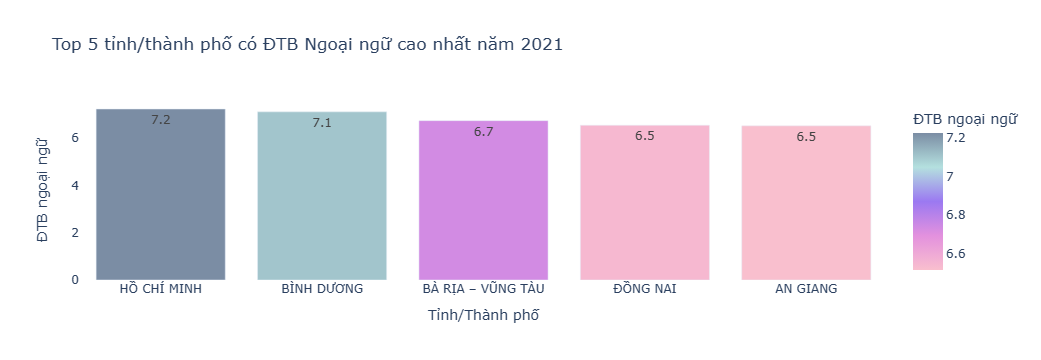

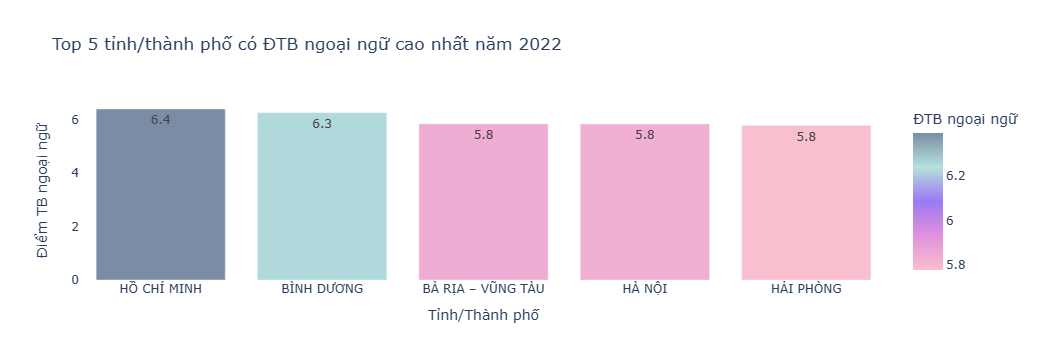

In [83]:
colors = ["#f25c11", '#f7c141', '#f7f9e0', '#192b59', '#7b8da4', '#b4e0df', '#9b79f1', '#e391de', '#f9bfce']
# Plotly bar plot
fig1=px.bar(df1.head(5), x='Tỉnh/Thành phố', y='ĐTB ngoại ngữ', color='ĐTB ngoại ngữ', 
             color_continuous_scale=colors[:3:-1], text_auto='.2s',
             title = "Top 5 tỉnh/thành phố có ĐTB Ngoại ngữ cao nhất năm 2020")
fig1.update_yaxes(title="ĐTB ngoại ngữ",showgrid=False)
fig1.update_xaxes(showgrid=False)
fig1.update_layout(plot_bgcolor= 'white')
fig1.show()

#2021
fig2=px.bar(df2.head(5), x='Tỉnh/Thành phố', y='ĐTB ngoại ngữ', color='ĐTB ngoại ngữ', 
             color_continuous_scale=colors[:3:-1], text_auto='.2s',
             title = "Top 5 tỉnh/thành phố có ĐTB Ngoại ngữ cao nhất năm 2021")
fig2.update_yaxes(title="ĐTB ngoại ngữ",showgrid=False)
fig2.update_xaxes(showgrid=False)
fig2.update_layout(plot_bgcolor= 'white')
fig2.show()

#2022
fig3=px.bar(df3.head(5), x='Tỉnh/Thành phố', y='ĐTB ngoại ngữ', color='ĐTB ngoại ngữ', 
             color_continuous_scale=colors[:3:-1], text_auto='.2s',
             title = "Top 5 tỉnh/thành phố có ĐTB ngoại ngữ cao nhất năm 2022")
fig3.update_yaxes(title="Điểm TB ngoại ngữ",showgrid=False)
fig3.update_xaxes(showgrid=False)
fig3.update_layout(plot_bgcolor= 'white')
fig3.show()


#### Nhận xét

- ĐTB ngoại ngữ trong kỳ thi THPTQG 2021 cao hơn năm 2020 và 2022.
- Một số điều đặc biệt:
    - TP Hồ Chí Minh có ĐTB ngoại ngữ đứng đầu cả nước trong suốt ba năm liền. Và tỉnh Bình Dương luôn giữ vững vị trí thứ 2, tỉnh Bà Rịa-Vũng Tàu luôn đứng ở vị trí thứ 3. Đây đều là những tỉnh/thành phố có nền kinh tế phát triển nhất Việt Nam. Đi kèm với sự phát triển đó thì chất lượng giảng dạy ở bộ môn Ngoại ngữ cũng được nâng cao, đa số các bậc phụ huynh và học sinh có nhận thức cao về tầm quan trọng của kỹ năng ngoại ngữ. 
    - So với ĐTB ngoại ngữ của cả nước thì các tỉnh thành lọt top 5 qua các năm ở trên đều cao hơn rất nhiều. Với ĐTB ngoại ngữ cả nước:
        - 2020: 4.568337
        - 2021: 5.855004
        - 2022: 5.157686

# Câu hỏi 5

#### Nội dung câu hỏi

Thủ hãy tìm ra mức điểm của thủ khoa các khối A, B, C trong 3 năm 2020, 2021, 2022.

#### Ý nghĩa khi trả lời được câu hỏi

Khi trả lời được câu hỏi này, chúng ta sẽ xác định được mức điểm để có thể trở thành thủ khoa của các khối A, B,C qua từng năm. Và liệu có dễ dàng để trở thành thủ khoa trong kỳ thi THPTQG/

#### Tiền xử lý

Đây là dạng câu hỏi thống kê kết quả, vì vậy để trả lời cho câu hỏi này chúng ta sẽ tìm ra mức điểm cao nhất của các khối A, B, C qua từng năm, với:

- Tổ hợp môn của các khối: 
    - Khối A: Toán, Lí, Hóa.
    - Khối B: Toán, Hóa, Sinh.
    - Khối C: Văn, Sử, Địa.
    
Bước 1: Tính toán số liệu cho từng năm:
    - Với năm 2020, ta sẽ tìm ra tổng điểm thi khối A, B, C cao nhất bằng cách cộng tổng điểm thi trong tổ hợp môn. Sau đó dùng phương thức `max` để tìm ra điểm thi cao nhất. Và lưu điểm thi thủ khoa các khối vào trong mảng `ThuKhoa2020`.
    - Tương tự cho các năm 2021, 2022 (ứng với 2 mảng là `ThuKhoa2021`, `ThuKhoa2022`).

Bước 2: Tạo dataframe `data` để lưu trữ kết quả điểm thi thủ khoa của các khối A, B, C trong 3 năm 2020, 2021, 2022.

**Code bước 1:**

In [84]:
temp_2020=grade_df["2020"]
temp_2020['Khối A']=temp_2020['Toán']+temp_2020['Lí']+temp_2020['Hóa']
temp_2020['Khối B']=temp_2020['Toán']+temp_2020['Sinh']+temp_2020['Hóa']
temp_2020['Khối C']=temp_2020['Văn']+temp_2020['Sử']+temp_2020['Địa']
ThuKhoa2020=[temp_2020['Khối A'].max(),temp_2020['Khối B'].max(),temp_2020['Khối C'].max()]

temp_2021=grade_df["2021"]
temp_2021['Khối A']=temp_2021['Toán']+temp_2021['Lí']+temp_2021['Hóa']
temp_2021['Khối B']=temp_2021['Toán']+temp_2021['Sinh']+temp_2021['Hóa']
temp_2021['Khối C']=temp_2021['Văn']+temp_2021['Sử']+temp_2021['Địa']
ThuKhoa2021=[temp_2021['Khối A'].max(),temp_2021['Khối B'].max(),temp_2021['Khối C'].max()]

temp_2022=grade_df["2022"]
temp_2022['Khối A']=temp_2022['Toán']+temp_2022['Lí']+temp_2022['Hóa']
temp_2022['Khối B']=temp_2022['Toán']+temp_2022['Sinh']+temp_2022['Hóa']
temp_2022['Khối C']=temp_2022['Văn']+temp_2022['Sử']+temp_2022['Địa']
ThuKhoa2022=[temp_2022['Khối A'].max(),temp_2022['Khối B'].max(),temp_2022['Khối C'].max()]

In [85]:
print(f"Điểm thi thủ khoa 2020 các khối: A, B, C")
print(ThuKhoa2020)
print(f"Điểm thi thủ khoa 2021 các khối: A, B, C")
print(ThuKhoa2021)
print(f"Điểm thi thủ khoa 2022 các khối: A, B, C")
print(ThuKhoa2022)

Điểm thi thủ khoa 2020 các khối: A, B, C
[29.75, 29.8, 29.25]
Điểm thi thủ khoa 2021 các khối: A, B, C
[29.55, 30.0, 29.25]
Điểm thi thủ khoa 2022 các khối: A, B, C
[30.0, 29.35, 29.75]


**Code bước 2:**

In [86]:
data=pd.DataFrame(np.array([ThuKhoa2020,ThuKhoa2021,ThuKhoa2022]), columns=['Khối A','Khối B', 'Khối C'], index=['2020', '2021', '2022'])

In [87]:
data

,Khối A,Khối B,Khối C
2020,29.75,29.80,29.25
2021,29.55,30.00,29.25
2022,30.00,29.35,29.75


#### Phân tích dữ liệu để trả lời cho các câu hỏi

- Tiến hành trực quan hóa bằng biểu đồ dạng bảng `Table` (thư viện graph_objects) để thống kê điểm thủ qua từng khối qua từng năm.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

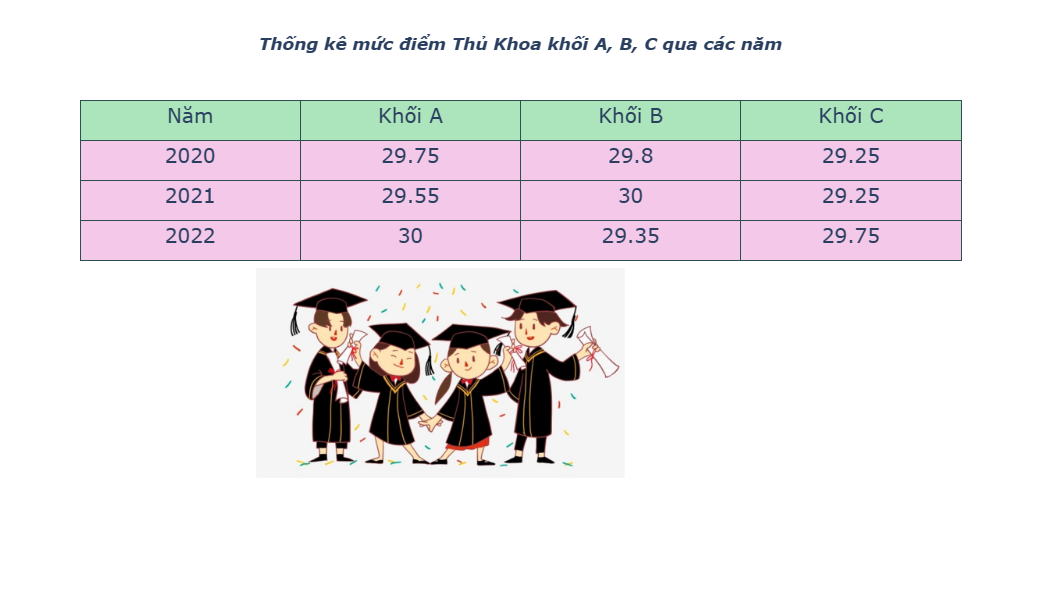

In [88]:
layout = go.Layout(title = {'text': "<b><i>Thống kê mức điểm Thủ Khoa khối A, B, C qua các năm</i></b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   width = 800,
                   height = 600)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Năm','Khối A', 'Khối B', 'Khối C'],
                line_color='darkslategray',
                fill_color='#ACE5BC',
                align='center',
               height=40,
               font_size=20),
    cells=dict(values=[data.index,
                       data['Khối A'],
                       data['Khối B'],
                       data['Khối C']],
               line_color='darkslategray',
               fill_color='#F3C8E9',
               align='center',
              height=40,
              font_size= 20))
],layout=layout)

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/EDA-World-Population/main/Untitled.png",
        xref="paper", yref="paper",
        y=0.6, x=0.2,
        opacity= 1,
        sizex=0.7, sizey=0.5,
        xanchor="left", yanchor="top"
    )
)
fig.show()

#### Nhận xét

- Mức điểm để có thể trở thành Thủ khoa ở tất cả các khối (A, B, C) đều rất cao: xấp xỉ 30 điểm, thậm chí đạt tuyệt đối 30 điểm ở khối B (năm 2021) và khối A (năm 2022).
- Đòi hỏi thí sinh phải giỏi một cách xuất sắc ở tất các môn trong tổ hợp, và có chiến thuật làm bài cẩn thận hợp lí.

# Câu hỏi 6

#### Nội dung câu hỏi

Thống kê điểm liệt ở các môn qua từng năm thay đổi như thế nào.

#### Ý nghĩa khi trả lời được câu hỏi

Đâu là môn học mà học sinh ít quan tâm nhất, thấy được tình trạng học lệch trong các môn không theo khối thi mà học sinh lựa chọn xét tuyển đại học. Nhằm cải thiện chất lượng đào tạo cũng như cách thức đào tạo cho môn học đó.

#### Tiền xử lý

- Bước 1: Tính toán số liệu cho từng năm và lưu vào một dictionary với cặp key - value như sau:
    + key: Đại diện cho năm thi.
    + value: Là một Series với index là tên môn học, values là số lượng thí sinh bị điểm liệt ở môn học đó trong năm đang xét.
- Bước 2: Dùng dictionary vừa tạo ở bước 1 để tạo một DataFrame với index là các môn và columns là các năm từ 2020 đến 2022. Giá trị trong mỗi columns là số lượng thí sinh bị điểm liệt ở mỗi môn tương ứng với năm của columns đó.

**Code bước 1:**

In [89]:
under_grade={}
for i in range(2020,2023):
    temp=grade_df[str(i)][['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH']]
    under_grade[str(i)]=temp[temp<=1].count()
    under_grade[str(i)]['Tổng']=under_grade[str(i)].sum()

**Code bước 2:**

In [90]:
columns=['2020','2021','2022']
under_grade_df={columns[i]:list(under_grade[columns[i]].values) for i in range(len(columns))}
under_grade_df['Môn']=['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH','Tổng']
under_grade_df=pd.DataFrame(under_grade_df).set_index('Môn')

In [91]:
under_grade_df

,2020,2021,2022
Môn,,,
Toán,208,117,164
Lí,40,25,22
Hóa,39,58,40
Sinh,44,74,92
Sử,125,534,80
Địa,148,116,38
Văn,137,167,194
GDCD,48,28,28
Ngoại ngữ,573,141,418


#### Phân tích dữ liệu để trả lời cho các câu hỏi

- Tiến hành trực quan hóa bằng biểu đồ dạng bảng `Table` (thư viện graph_objects) để thống kê số lượng thí sinh bị điểm liệt ở các môn qua mỗi năm.
- Điều chỉnh các tham số và cài đặt các label/title..., sao cho hình ảnh trực quan được rõ ràng đẹp mắt.

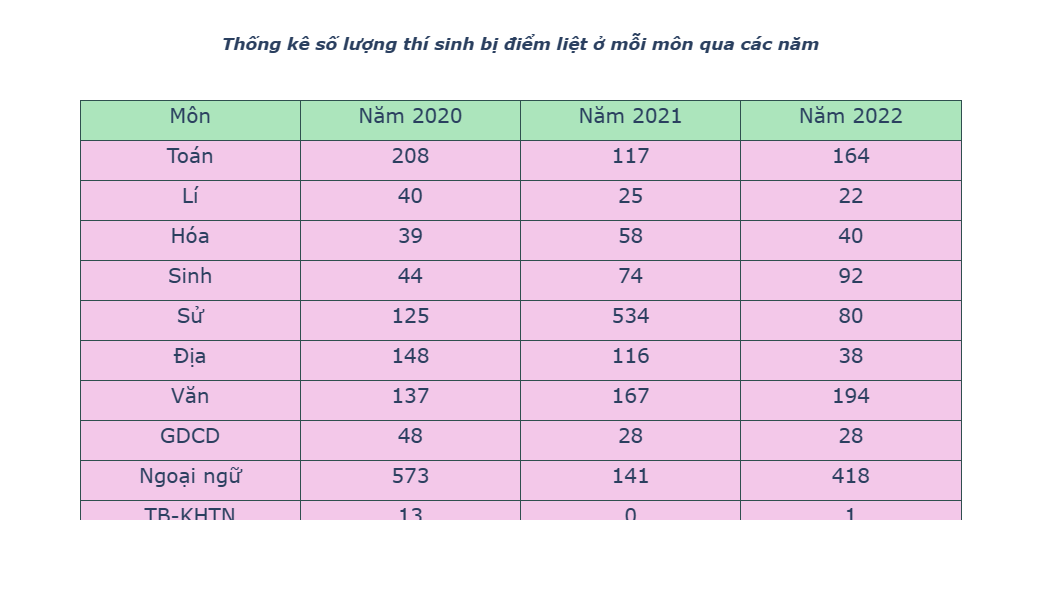

In [92]:
layout = go.Layout(title = {'text': "<b><i>Thống kê số lượng thí sinh bị điểm liệt ở mỗi môn qua các năm</i></b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   width = 800,
                   height = 600)

fig = go.Figure(data=[go.Table(
    header=dict(values=['Môn','Năm 2020', 'Năm 2021', 'Năm 2022'],
                line_color='darkslategray',
                fill_color='#ACE5BC',
                align='center',
               height=40,
               font_size=20),
    cells=dict(values=[under_grade_df.index,
                       under_grade_df['2020'],
                       under_grade_df['2021'],
                       under_grade_df['2022']],
               line_color='darkslategray',
               fill_color='#F3C8E9',
               align='center',
              height=40,
              font_size= 20))
],layout=layout)

fig.show()

#### Nhận xét

- Dễ nhận thấy điểm liệt cao nhất ở năm 2020 với khoảng 1410 trường hợp, và giảm dần từ 2020 đến nay. Nguyên nhân có thể là do năm 2021, 2022 ảnh hưởng của dịch bệnh covid 19 quá nặng nề làm hình thức học tập chuyển sang hình thức online do đó đề thi có phần dễ hơn năm 2020.
- Điểm liệt ở các môn của khối tự nhiên luôn ít hơn điểm liệt ở các môn của khối xã hội, cho thấy chất lượng bài làm ở các môn này khá được đảm bảo. Có thể do các môn dòi hỏi tư duy và không cần học thuộc bài nên các bạn chọn theo khối tự nhiên không có tình trạng không trúng tủ sẽ hoàn toàn không biết làm mà có thể suy nghĩ vận dụng toàn bộ các kiến thức đã học.
- Điểm liệt ở các môn tự nhiên luôn ít hơn hẳn các môn xã hội cũng cho thấy tính cạnh tranh rất cao trong các khối xét tuyển của tổ hợp tự nhiên, đòi hỏi thí sinh phải làm bài một cách kĩ lưỡng và thận trọng từng điềm số.
- Ngoại ngữ luôn là môn có số điểm liệt rất cao cho thấy thực trạng kém ngoại ngữ của các học sinh Việt Nam khi ở cấp 3 hầu hết các bạn theo khối tự nhiên hoặc xét tuyển các khối xã hội mà không liên quan ngoại ngữ sẽ rất ít quan tâm đến ngoại ngữ.
- Một điều đặc biệt là số điểm liệt của môn lịch sử ở năm 2021 tăng đột biến và số điểm liệt của môn ngoại ngữ ở năm 2021 lại giảm đột biến, điều này là do năm 2021 đề thi môn lịch sử rất khó và ngược lại đề thi môn ngoại ngữ lại dễ hơn các năm khác làm điểm chuẩn tăng mạnh ở khối có xét ngoại ngữ.

# Câu hỏi 7

#### Nội dung câu hỏi

Tương quan điểm thi trung bình với số lượng thí sinh dự thi ở các môn qua các năm như thế nào.

#### Ý nghĩa khi trả lời được câu hỏi

Những môn học bắt buộc sẽ có điểm số khác biệt như thế nào với cá môn tự chọn khi các thí sinh bước vào kì thi. Điểm trung bình có phản ánh đúng về phổ điểm của các môn hay không.

#### Tiền xử lý

- Bước 1: Viết hàm getDataFrame nhận vào một DataFrame và trả ra một DataFrame với index gồm 'ĐTB' và 'Số lượng thi' lần lượt là điểm trung bình và số lượng thí sinh dự thi ở mỗi môn thi trong một năm, columns là các môn thi.
- Bước 2: Dùng hàm trên tạo 3 DataFrame cho 3 năm.

**Code bước 1:**

In [93]:
def getDataFrame(df):
    mean_series=df.mean()
    count_series=df.count()
    columns=list(mean_series.index)
    result_df={columns[i]:[mean_series.values[i],count_series.values[i]] for i in range(len(columns))}
    result_df['Thống kê']=['ĐTB','Số lượng thi']
    return pd.DataFrame(result_df).set_index('Thống kê')

**Code bước 2:**

In [94]:
df20=getDataFrame(grade_df['2020'][['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH']])
df21=getDataFrame(grade_df['2021'][['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH']])
df22=getDataFrame(grade_df['2022'][['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH']])

#### Phân tích dữ liệu để trả lời cho các câu hỏi

DÙng lineplot thể hiện số lượng thí sinh dự thi ở mỗi môn trên cùng một khung hình với barplot thể hiện điểm trung bình ở mỗi môn.

In [95]:
def draw_plot(df, year):
    subjects=['Toán','Lí','Hóa','Sinh','Sử','Địa','Văn','GDCD','Ngoại ngữ','TB-KHTN','TB-KHXH']
    fig,ax1=plt.subplots(figsize=(13,5))# bar chart
    bars=ax1.bar(subjects,df.loc[['ĐTB']].values[0])
    for rect in bars:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
    ax2=ax1.twinx()
    ax2.plot(subjects,df.loc[['Số lượng thi']].values[0]/1000,lw=1,marker='o',color='r')
    ax1.set(xlabel='Môn', ylabel='ĐTB')
    ax2.set(ylabel='Số lượng thi(ngàn thí sinh)')
    ax2.set_ylim(0,1000)
    ax1.set_title(f'Tương quan điểm trung bình và số lượng thí sinh dự thi ở các môn năm {year}', size=15)
    fig.tight_layout()
    plt.show();

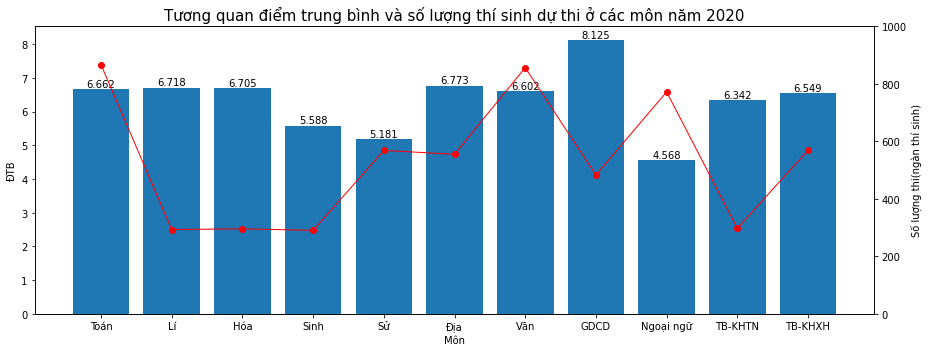

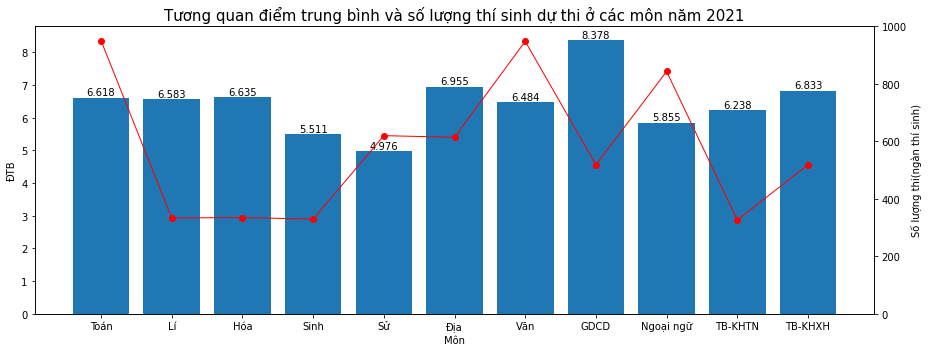

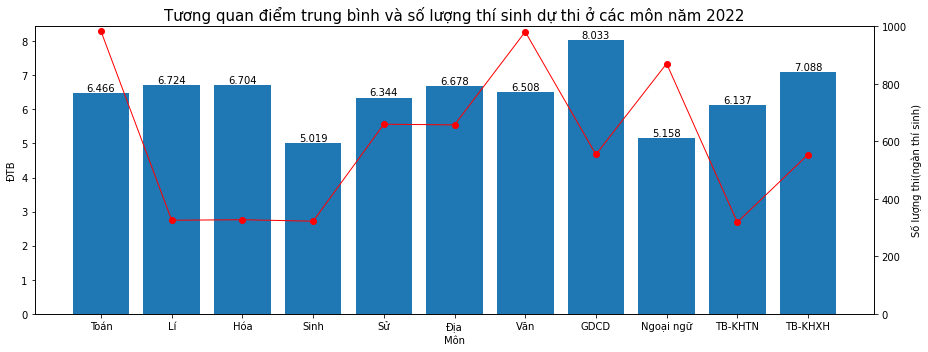

In [96]:
draw_plot(df20, 2020)
draw_plot(df21, 2021)
draw_plot(df22, 2022)

#### Nhận xét

- Điều dễ dàng nhận thấy qua  3 năm là điểm GDCD luôn rất cao do môn này tự chọn và đề dễ nên các thí sinh dự thi thường đạt điểm rất lớn.
- Điểm trung bình của tổ hợp tự nhiên và tổ hợp xã hội khá tương đồng ở 3 năm nhưng số lượng dự thi của tổ hợp tự nhiên luôn ít hơn hẳn tổ hợp xã hội, cho thấy chất lượng bài làm ở những môn tự nhiên luôn được đảm bảo hơn so với xã hội.
- Ở 3 năm số lượng dự thi và điểm trung bình ở những môn chung trong một tổ hợp như Toán - Lí - Hóa hay Văn - Sử - Địa không có gì chênh lệch bất thường, cho thấy thực trạng các môn trong tổ hợp xét tuyển của một thí sinh thỉ thí sinh đó học rất đều.
- Trong mỗi năm sự biến thiên về số lượng thí sinh dự thi ở các môn là không khác biệt có thể là ảnh hưởng do định hướng từ gia đình và người đi trước hoặc dữ liệu thống kê trên Internet của các trang trước đến quyết định của thí sinh.